In [0]:
from keras.datasets.mnist import load_data
# ((x_train, y_train), (x_test, y_test))
(x_train, y_train), (x_test, y_test) = load_data()

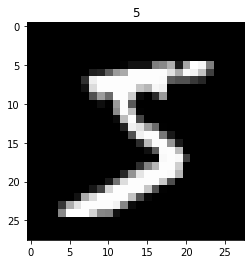

In [3]:
import matplotlib.pyplot as plt
% matplotlib inline
plt.title(str(y_train[0]))
plt.imshow(x_train[0], cmap="gray")

In [5]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [6]:
import pandas as pd
pd.DataFrame(x_train[0])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0


In [7]:
x_train_reshape = x_train.reshape(-1, 784)
x_test_reshape = x_test.reshape(-1, 784)
pd.DataFrame(x_train_reshape)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,147,252,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
from sklearn.decomposition.pca import PCA
pca = PCA(n_components=30)
pca.fit(x_train_reshape)
ratio = pca.explained_variance_ratio_
print("Explaned:", ratio)
print("Sum:", sum(ratio))

Explaned: [0.09704664 0.07095924 0.06169089 0.05389419 0.04868797 0.04312231
 0.0327193  0.02883895 0.02762029 0.02357001 0.0210919  0.02022991
 0.01715818 0.01692111 0.01578641 0.01482953 0.01324561 0.01276897
 0.01187262 0.01152683 0.01066162 0.01006709 0.0095357  0.00912521
 0.0088337  0.00839305 0.00812506 0.007862   0.00744621 0.00690791]
Sum: 0.7305384262507671


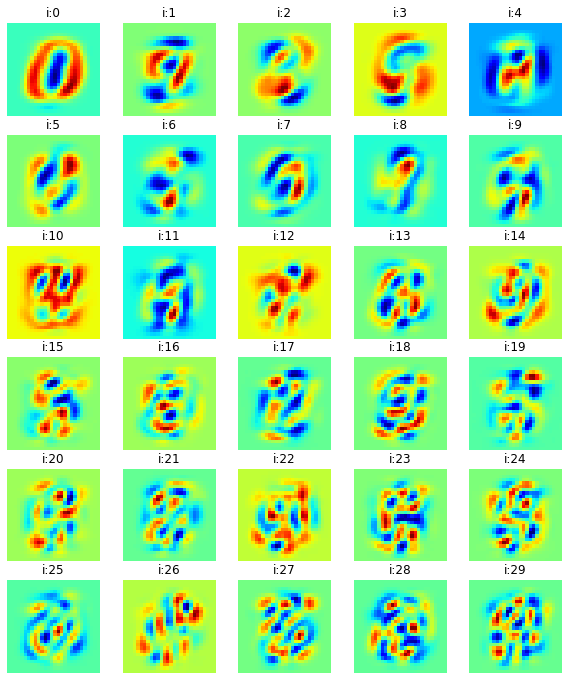

In [21]:
width = 5
height = len(pca.components_) // width + 1
plt.figure(figsize=(10, 14))
for i, comp in enumerate(pca.components_):
    c = comp.reshape(28, 28)
    plt.subplot(height, width, i + 1)
    plt.title("i:{}".format(i))
    plt.axis("off")
    plt.imshow(c, cmap="jet")

In [24]:
x_train_30 = pd.DataFrame(pca.transform(x_train_reshape))
x_test_30 = pd.DataFrame(pca.transform(x_test_reshape))
x_test_30

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,-332.271169,747.798716,-42.844819,-311.173911,-495.361139,242.372425,392.906057,470.745667,-399.245041,-186.130268,194.885440,-110.457065,33.545203,-220.143965,-138.025113,-80.057923,290.481454,255.356433,72.069398,57.177638,-52.886454,244.730798,51.170394,-81.889275,-129.064499,-40.564300,137.765120,-29.765342,18.751676,-211.931382
1,20.696962,-955.584583,-152.715517,398.677351,-50.967380,-470.452975,279.350891,231.401507,147.145533,-87.241118,189.290958,33.331459,-2.019553,-831.921087,-9.998844,448.385740,566.168835,-1.448139,24.601150,-95.298826,407.845165,292.128249,68.917098,247.854301,-138.144605,-282.335382,53.408480,-5.324197,30.744499,-55.651298
2,-946.026868,-430.843183,66.176336,260.102628,-534.094049,87.885281,-24.017073,-109.968602,98.752776,-135.802631,-57.897488,-83.658403,-178.419655,304.942147,-305.101594,44.332901,12.924785,-37.196479,-70.142216,-28.358746,17.515025,66.339005,36.730297,65.624379,3.894550,19.570763,198.658348,-15.136657,12.476534,-202.187514
3,1233.906987,112.940451,253.809695,-98.253120,-208.586574,-485.517632,695.602341,76.269194,21.424521,-52.396262,-520.907163,-233.136351,-86.818927,-113.457560,-379.126671,-46.693475,-147.869907,208.930582,-178.407836,-354.564452,67.263095,161.485871,104.692454,56.981553,-0.164559,310.737074,-175.583402,170.682803,-222.425388,149.160864
4,189.278173,714.581330,-291.911101,631.328012,-149.398233,224.580819,-495.415197,236.949276,-341.269770,194.687817,138.201996,-211.721407,247.343556,135.106426,-278.547124,323.003491,-234.141468,-157.146804,-116.787020,-49.977154,41.806746,106.272559,-101.487815,399.938931,-302.342026,-100.137480,-185.759946,22.657787,97.966434,-102.678167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,302.242225,-547.246249,-37.188009,269.367683,816.490587,951.124952,790.766588,235.804069,-565.939860,-37.611731,-144.607967,29.492947,-79.806355,70.938842,212.766647,249.886418,169.121265,-120.005443,318.508934,37.585268,69.462978,-274.245239,223.248671,157.110398,182.323883,-44.049403,-73.892704,-74.260504,-203.240807,196.514296
9996,575.699002,-692.076222,-820.005490,-192.085638,117.562138,-202.237724,681.431542,777.635705,-100.796074,-40.213821,170.988495,-90.218708,44.950335,220.908615,30.434309,-234.823470,-158.587129,44.088836,239.138237,-58.632651,521.409119,210.301946,-160.508213,32.966710,-151.667066,303.212398,-32.295172,212.721913,152.721252,154.608199
9997,-270.187755,596.870087,355.110676,-414.954505,671.733585,162.863466,-42.198851,-352.594680,-24.632368,-802.656993,-172.868979,192.580871,-11.561661,207.695552,72.833520,47.378441,-37.291641,48.140485,94.725446,-72.843065,-414.535895,170.710033,57.251144,-100.080109,120.794072,-4.948064,-17.416624,156.636443,118.603464,-90.168837
9998,-314.027192,-108.603556,642.839801,-253.351626,-147.128724,-276.276463,162.283513,166.058851,270.144609,-215.535141,-1.145164,550.268075,416.866294,-451.046022,123.795892,262.072092,32.228441,101.221402,-271.715115,-224.573984,-134.989637,261.417507,-292.027910,-27.311324,253.162810,406.597534,203.913660,-67.224783,-275.085736,13.438922
